# Relativistic Multifluids and the two-stream instability

In [1]:
%matplotlib inline

In [Hawke, Andersson and Comer (2013)](http://dx.doi.org/10.1088/0264-9381/30/14/145007) there is a demonstration of the relativistic two stream instability, where two interacting fluids become unstable solely due to their interaction and relative velocity. This demonstration involves both a calculation in the linear regime (where the instability had already been demonstrated repeatedly using dispersion relation techniques), and using a nonlinear code.

The nonlinear code [can be found on github](https://github.com/IanHawke/MultiFluid1d). The linearized exact solution was a messy Matlab code. Here we provide a python reimplementation which should (!) be easier to work with in the long run.

## Stability region

The two stream instability only occurs in certain regions of parameter space. This depends on the master function (often referred to as the equation of state, or EOS), the background, and the relative velocity. As outlined in the paper, this occurs when the roots of a particular polynomial have non-trivial imaginary part.

We reproduce Figure 1 in the paper using the following script.

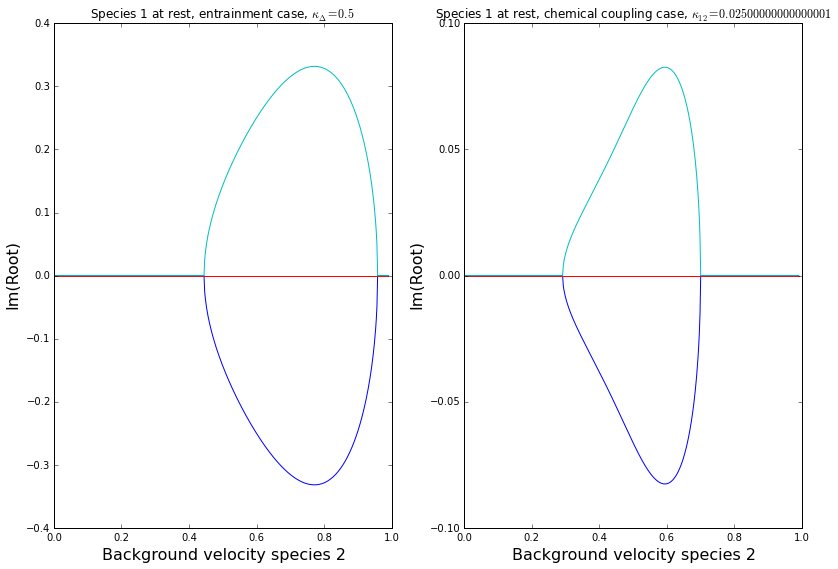

In [2]:
# %load StabilityPlots.py
# This is meant to reproduce the output of MultiFluidStabilityPlots.m
# which in turn produces figure 1 of Hawke, Andersson & Comer 2013.

import numpy as np
import matplotlib.pyplot as plt
import EOS
import compute_perturbation as mf

# EOS options.
options_entrain = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                        ('kappa', [0.5, 0.5])             , \
                        ('kappa_12', 0.0)                 , \
                        ('kappa_delta', 0.5)              , \
                        ('gamma', [1.6, 1.8])             , \
                        ('m', [1.0, 1.0])                 , \
                        ('sigma', [0.0, 0.0])])
options_cc      = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                        ('kappa', [0.25**0.25, 1.0])      , \
                        ('kappa_delta', 0.0)              , \
                        ('gamma', [1.0, 4.0 / 3.0])       , \
                        ('m', [0.0, 0.0])                 , \
                        ('sigma', [1.1, 1.1])])
options_cc['kappa_12'] = 0.1 * options_cc['kappa'][0] ** \
                         (4.0 - 3.0 * \
                              (options_cc['sigma'][0] - options_cc['sigma'][1]))

# Parameter survey options.
rho_bg = 1.0
v_bg1  = 0.0
W_bg1  = 1.0
v_bg2 = np.linspace(0.0, 0.99, 500)
W_bg2 = 1.0 / np.sqrt(1.0 - v_bg2**2)

imag_roots_entrain = np.zeros((len(v_bg2), 4))
imag_roots_cc = np.zeros_like(imag_roots_entrain)

for j in range(len(v_bg2)):
    options_entrain['n_bg'] = np.array([[rho_bg * W_bg1,     rho_bg * W_bg1    * v_bg1], \
                                        [rho_bg * W_bg2[j],  rho_bg * W_bg2[j] * v_bg2[j]]])
    all_roots = mf.calc_roots(options_entrain)
    imag_roots_entrain[j, :] = sorted(np.imag(all_roots))
    options_cc['n_bg'] = options_entrain['n_bg']
    all_roots = mf.calc_roots(options_cc)
    imag_roots_cc[j, :] = sorted(np.imag(all_roots))

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.plot(v_bg2, imag_roots_entrain)
plt.xlabel("Background velocity species 2", size = 16)
plt.ylabel("Im(Root)", size = 16)
plt.title("Species 1 at rest, entrainment case, $\kappa_{{\Delta}} = {}$".format(options_entrain['kappa_delta']))
plt.subplot(1,2,2)
plt.plot(v_bg2, imag_roots_cc)
plt.xlabel("Background velocity species 2", size = 16)
plt.ylabel("Im(Root)", size = 16)
plt.title("Species 1 at rest, chemical coupling case, $\kappa_{{12}} = {}$".format(options_cc['kappa_12']))
plt.tight_layout()
plt.show()


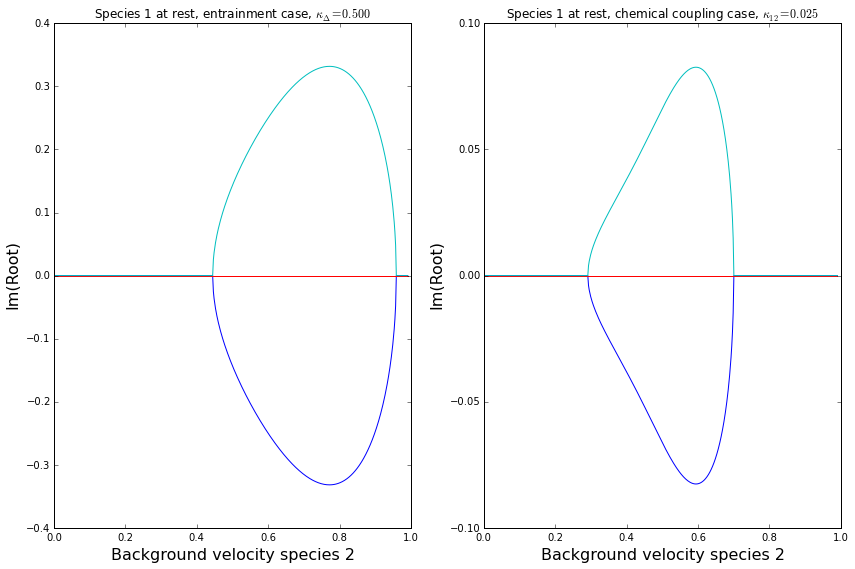

In [3]:
# This is meant to reproduce the output of MultiFluidStabilityPlots.m
# which in turn produces figure 1 of Hawke, Andersson & Comer 2013.

import numpy as np
import matplotlib.pyplot as plt
import EOS
import compute_perturbation as mf

# EOS options.
options_entrain = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                        ('kappa', [0.5, 0.5])             , \
                        ('kappa_12', 0.0)                 , \
                        ('kappa_delta', 0.5)              , \
                        ('gamma', [1.6, 1.8])             , \
                        ('m', [1.0, 1.0])                 , \
                        ('sigma', [0.0, 0.0])])
options_cc      = dict([('EOS_Derivatives', EOS.EOS_Paper), \
                        ('kappa', [0.25**0.25, 1.0])      , \
                        ('kappa_delta', 0.0)              , \
                        ('gamma', [1.0, 4.0 / 3.0])       , \
                        ('m', [0.0, 0.0])                 , \
                        ('sigma', [1.1, 1.1])])
options_cc['kappa_12'] = 0.1 * options_cc['kappa'][0] ** \
                         (4.0 - 3.0 * \
                              (options_cc['sigma'][0] - options_cc['sigma'][1]))

# Parameter survey options.
rho_bg = 1.0
v_bg1  = 0.0
W_bg1  = 1.0
v_bg2 = np.linspace(0.0, 0.99, 500)
W_bg2 = 1.0 / np.sqrt(1.0 - v_bg2**2)

imag_roots_entrain = np.zeros((len(v_bg2), 4))
imag_roots_cc = np.zeros_like(imag_roots_entrain)

for j in range(len(v_bg2)):
    options_entrain['n_bg'] = np.array([[rho_bg * W_bg1,     rho_bg * W_bg1    * v_bg1], \
                                        [rho_bg * W_bg2[j],  rho_bg * W_bg2[j] * v_bg2[j]]])
    all_roots = mf.calc_roots(options_entrain)
    imag_roots_entrain[j, :] = sorted(np.imag(all_roots))
    options_cc['n_bg'] = options_entrain['n_bg']
    all_roots = mf.calc_roots(options_cc)
    imag_roots_cc[j, :] = sorted(np.imag(all_roots))

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
plt.plot(v_bg2, imag_roots_entrain)
plt.xlabel("Background velocity species 2", size = 16)
plt.ylabel("Im(Root)", size = 16)
plt.title("Species 1 at rest, entrainment case, $\kappa_{{\Delta}} = {:.3f}$".format(options_entrain['kappa_delta']))
plt.subplot(1,2,2)
plt.plot(v_bg2, imag_roots_cc)
plt.xlabel("Background velocity species 2", size = 16)
plt.ylabel("Im(Root)", size = 16)
plt.title("Species 1 at rest, chemical coupling case, $\kappa_{{12}} = {:.3f}$".format(options_cc['kappa_12']))
plt.tight_layout()
plt.show()


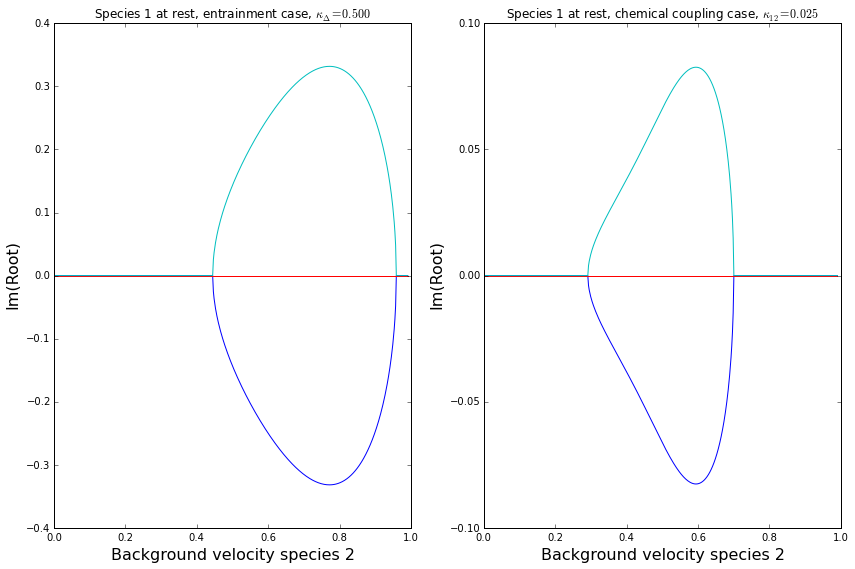

In [4]:
%run StabilityPlots.py